## 데이터 불러오기

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np

In [2]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Hackathon/1.210209_10/1.data'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)


print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('test data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태
print('item_categories data dim : {}'.format(item_categories.shape)) # 아이템 카데고리 데이터 형태
print('items data dim : {}'.format(items.shape)) # 아이템 데이터 형태
print('shops data dim : {}'.format(shops.shape)) # 상점 데이터 형태

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)


In [3]:
print(train.columns)
print(test.columns)
print(sample_submission.columns)
print(item_categories.columns)
print(items.columns)
print(shops.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')
Index(['ID', 'item_cnt_month'], dtype='object')
Index(['item_category_name', 'item_category_id'], dtype='object')
Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
Index(['shop_name', 'shop_id'], dtype='object')


# 데이터 타입 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [7]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


***

# 데이터 프레임 확인

In [9]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [10]:
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [11]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [12]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [13]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [14]:
sample_submission.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


***

## 결측치 탐색

In [15]:
# 결측치 없음
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))    
print('------------------------------------------------------------------')
for c in test.columns:
    print('{} : {}'.format(c, len(test.loc[pd.isnull(test[c]), c].values)))
print('------------------------------------------------------------------')
for c in item_categories.columns:
    print('{} : {}'.format(c, len(item_categories.loc[pd.isnull(item_categories[c]), c].values)))
print('------------------------------------------------------------------')
for c in items.columns:
    print('{} : {}'.format(c, len(items.loc[pd.isnull(items[c]), c].values)))
print('------------------------------------------------------------------')
for c in shops.columns:
    print('{} : {}'.format(c, len(shops.loc[pd.isnull(shops[c]), c].values)))

date : 0
date_block_num : 0
shop_id : 0
item_id : 0
item_price : 0
item_cnt_day : 0
------------------------------------------------------------------
ID : 0
shop_id : 0
item_id : 0
------------------------------------------------------------------
item_category_name : 0
item_category_id : 0
------------------------------------------------------------------
item_name : 0
item_id : 0
item_category_id : 0
------------------------------------------------------------------
shop_name : 0
shop_id : 0


***

# 이상치 탐색

### 1) train

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

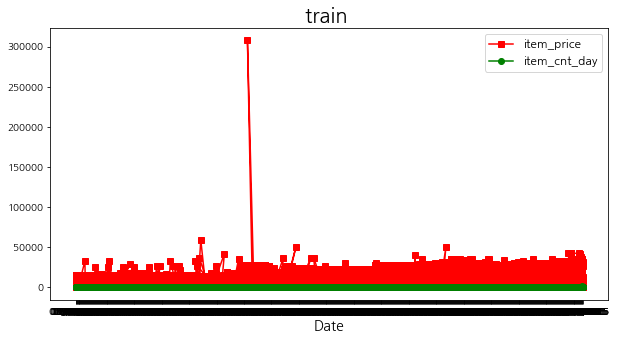

In [17]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(train.date, train.item_price, marker='s', color='r')
plt.plot(train.date, train.item_cnt_day, marker='o', color='g')
# plt.plot(train.date, train.Low, marker='*', color='b')
# plt.plot(train.date, train.Open, marker='+', color='y')

plt.title('train ', fontsize=20) 
# plt.ylabel('Stock', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['item_price', 'item_cnt_day'], fontsize=12, loc='best')

plt.show()

In [18]:
# item_price가 너무 이상하게 큰 값 찾기
train[train['item_price']>250000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


### 그래프를 보면 가격이 50,000이하로 분포되어 있다.
### 아마 0이 추가로 입력된 것으로 판단.
### 307980.0 ->  30798.0으로 수정

In [19]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [20]:
# 이상치 수정
train.loc[train.item_id == 6066, 'item_price'] = train.loc[1163158]['item_price'] / 10
train.iloc[1163158:1163159, :]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,30798.0,1.0


## ❓질문❓
### 1. train 데이터 프레임에서 이상치 찾는 법? ('date', 'date_block_num', 'shop_id', 'item_id')
### 2. train의 item_id와 test의 item_id 다르다?
### 3. test의 ID를 train에 넣고 싶은데 합치는 방법
### 4. 불필요 컬럼 선정

# 여기까지 작성. 아래는 연습

### 2) test

In [21]:
print(len(train['shop_id'].unique()))
print(len(test['shop_id'].unique()))
print(len(train['item_id'].unique()))
print(len(test['item_id'].unique()))

60
42
21807
5100


In [22]:
train[['shop_id', 'item_id']]

,shop_id,item_id
0,59,22154
1,25,2552
2,25,2552
3,25,2554
4,25,2555
...,...,...
2935844,25,7409
2935845,25,7460
2935846,25,7459
2935847,25,7440


In [23]:
shop_item_id = pd.concat([train[['shop_id', 'item_id']], test[['shop_id', 'item_id']]])
print(len(shop_item_id['shop_id'].unique()))
print(len(shop_item_id['item_id'].unique()))

60
22170


In [24]:
train[(train['shop_id'] == 5) & (train['item_id'] == 5037)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953995,21.09.2014,20,5,5037,2599.0,1.0
2150561,29.11.2014,22,5,5037,2599.0,1.0
2288630,28.12.2014,23,5,5037,1999.0,1.0
2288631,20.12.2014,23,5,5037,1999.0,1.0
2335446,02.01.2015,24,5,5037,1999.0,1.0
2335447,07.01.2015,24,5,5037,1999.0,1.0
2618926,29.05.2015,28,5,5037,1299.0,1.0
2704068,28.06.2015,29,5,5037,1499.0,1.0
2719247,05.07.2015,30,5,5037,1499.0,1.0
2810661,14.08.2015,31,5,5037,1499.0,1.0


In [25]:
# array 정렬
train_shop_id = np.sort(train['shop_id'].unique())
print(train_shop_id)
print(len(train_shop_id))
test_shop_id = np.sort(test['shop_id'].unique())
print(test_shop_id)
print(len(test_shop_id))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60
[ 2  3  4  5  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 34 35 36 37
 38 39 41 42 44 45 46 47 48 49 50 52 53 55 56 57 58 59]
42
